In [69]:
import pandas as pd
import sqlite3 as sql
table_match = "Match"
table_team_arr = "Team"
path = r"C:/Users/edgil/Documents/Masters/DSTA/cw1/db/database.sqlite"
sql_conn = sql.connect(path)
sql_query_match = """SELECT MATCH.home_team_api_id,MATCH.away_team_api_id,MATCH.home_team_goal,MATCH.away_team_goal,MATCH.B365H,
                MATCH.B365A, MATCH.B365D, MATCH.possession
             FROM MATCH
             WHERE MATCH.home_team_api_id or MATCH.away_team_api_id in (10260,9825,10261, 8650, 8456, 8668, 8586, 8455, 8472)
             """
sql_query_team = '''SELECT Team_Attributes.chanceCreationShooting , Team_Attributes.team_api_id
             FROM Team_Attributes 
             WHERE Team_Attributes.team_api_id in 
             (10260,9825,10261, 8650, 8456, 8668, 8586, 8455, 8472)
            '''
dataDump = pd.read_sql(sql_query_match, sql_conn)
dataDump.to_csv(table_match + ".csv", encoding = "utf-16")
TeamAtt = pd.read_sql(sql_query_team, sql_conn)
TeamAtt.to_csv(table_team_arr + ".csv", encoding = "utf-16")
sql_conn.close()

In [96]:
home_pos = []
listy = dataDump.possession.str.split("comment>")
for el in listy:
    if el != None:
        if len(el) > 2:
            pos = el[1][:2]
            home_pos.append(int(pos))
        else:
            home_pos.append(None)
    else:
        home_pos.append(el)
dataDump['home_pos'] = pd.to_numeric(pd.Series(home_pos))
#dataDump['home_pos'] =  pd.to_numeric(pd.Series(dataDump['home_possession']))

In [97]:
teams = list(TeamAtt['team_api_id'].unique())
avg_chances = dict()
for team in teams:
    avg_chances[team] = int(TeamAtt.loc[TeamAtt['team_api_id'] == team].mean()[0])
print(avg_chances)

{9825: 46, 8455: 61, 8668: 49, 8650: 57, 8456: 52, 10260: 53, 10261: 49, 8472: 59, 8586: 62}


In [98]:
#dataDump['home_team_goal_spread'] = dataDump['home_team_goal'] - dataDump['away_team_goal']
import numpy as np
dataDump['goal_spread'] = dataDump['home_team_goal'] - dataDump['away_team_goal']
dataDump['home_w'] = dataDump['goal_spread'].apply(np.sign)

In [81]:
TeamAtt.loc[TeamAtt['team_api_id'] == 9825].mean()[0]

46.5

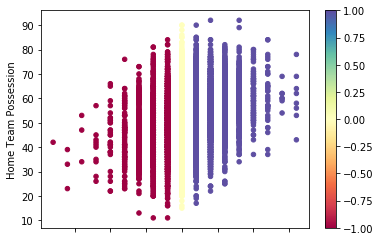

In [63]:
ax = dataDump.plot.scatter(x = "goal_spread", y = "home_pos", c = dataDump['home_w'], cmap = "Spectral")
ax.set_xlabel("Home Team Goals Scored")
ax.set_ylabel("Home Team Possession")
fig = ax.get_figure()
fig.savefig("home_pos_goals_spread.png")

In [125]:
#dataDump = dataDump.drop(columns = 'possession')
from sklearn.decomposition import PCA
# create X vector
X = dataDump[['home_w','home_pos','home_team_goal']]
#Y = dataDump['home_w']
X_dropped = X.dropna(axis = 0, how = "any")
#print(X_dropped)
pca_data = PCA(n_components=3).fit_transform(X_dropped)


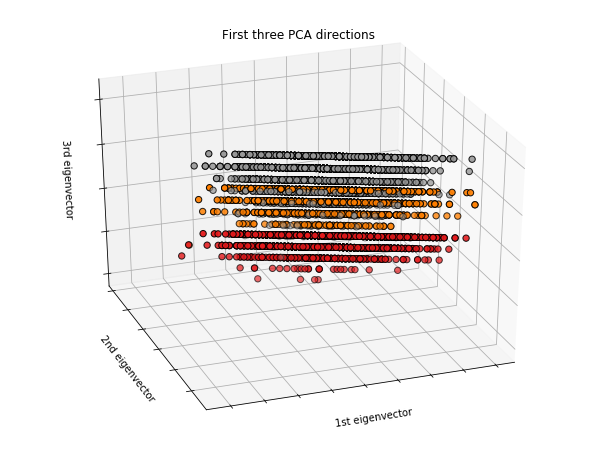

In [138]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=X_dropped['home_w'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
fig = ax.get_figure()
fig.savefig("pca.png")

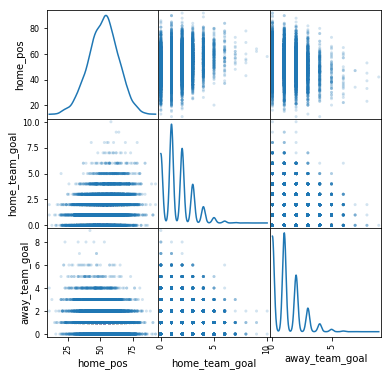

In [44]:
from pandas.plotting import scatter_matrix
ax = scatter_matrix(dataDump[['home_pos','home_team_goal','away_team_goal']], alpha=0.2, figsize=(6, 6), diagonal='kde')
fig = ax[0][0].get_figure()
fig.savefig('scatter.png')

In [47]:
dataDump.to_csv("soccer_data.csv", index = False)

C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)

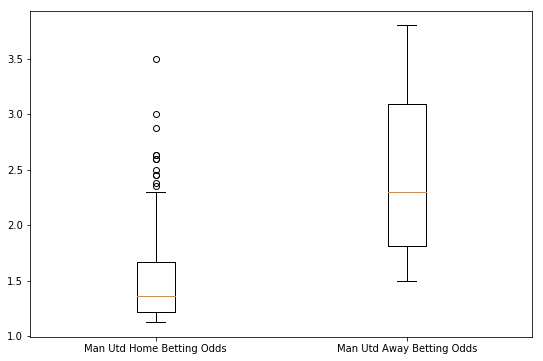

In [3]:
from matplotlib import pyplot as plt

man_utd_home = dataDump[dataDump['home_team_api_id'] == 10260]
newc_home = dataDump[dataDump['home_team_api_id'] == 10261]
man_utd_away = dataDump[dataDump['away_team_api_id'] == 10260]
man_utd_home['goal_spread'] = man_utd_home['home_team_goal']- man_utd_home['away_team_goal']
newc_home['goal_spread'] = newc_home['away_team_goal']- newc_home['home_team_goal']
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

#plt.hist(man_utd_home['B365H'])
plt.boxplot([man_utd_home['B365H'], man_utd_away['B365A']])
ax.set_xticklabels(['Man Utd Home Betting Odds', 'Man Utd Away Betting Odds'])
#plt.boxplot(newc_home['B365H'])
plt.show()
fig.savefig('fig1.png', bbox_inches='tight')
#print(man_utd_home[['home_team_goal','away_team_goal']])

In [ ]:
# add in a home win column


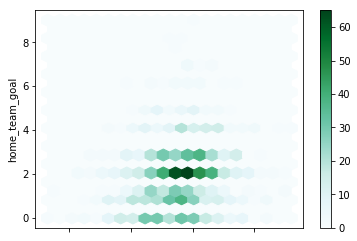

In [120]:
from matplotlib import pyplot as plt
dataDump.plot.hexbin(x = 'home_pos', y = 'home_team_goal', gridsize=20)
#home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365A,
plt.show()